Todo o código utilizado neste Notebook foi implementado por Rodolfo Marinho (rodolfomarinho (at) copin (dot) ufcg (dot) edu (dot) br).

O código pode ser encontrado no [Github](https://github.com/rodolfoams/MachineLearning-ufcg/tree/master/LinearRegression).
O desenvolvimento deste projeto foi baseado na [apresentação de Siraj Raval no Youtube](https://www.youtube.com/watch?v=XdM6ER7zTLk).

## Parametrização do código

Para facilitar o desenvolvimento desta atividade, foram adicionados diversos parâmetros que podem ser providos para executar a função `run` do algoritmo de regressão linear:

1. `--data-file` indica qual arquivo de dados a ser utilizado
2. `--initial-b` indica o palpite inicial para o valor de `b`na fórmula `ŷ = mx + b`
3. `--initial-b` indica o palpite inicial para o valor de `m`na fórmula `ŷ = mx + b`
4. `--num-iteration` indica o número de iterações da execução do algoritmo
5. `--learning-rate` indica a taxa de aprendizagem a ser usada no algoritmo
6. `--min-gradient` indica o menor gradiente necessário para que o algoritmo seja interrompido
7. `--show-rss` indica se o algoritmo exibe o RSS a cada iteração
8. `--save-gradients` indica se o algoritmo salva os gradientes de cada iteração no arquivo `gradients.csv`
9. `--normal-equation` indica se as equações devem ser usadas

In [1]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--data-file', default="data.csv", dest='data_file', type=str)
parser.add_argument('-b', '--initial-b', default=0.0, dest='initial_b', type=float)
parser.add_argument('-m', '--initial-m', default=0.0, dest='initial_m', type=float)
parser.add_argument('-i', '--num-iterations', default=1000, dest='num_iterations', type=int)
parser.add_argument('-r', '--learning-rate', default=0.0001, dest='learning_rate', type=float)
parser.add_argument('-e', '--min-gradient', default=0.00, dest='epsilon', type=float)
parser.add_argument('--show-rss', action='store_true', dest='print_rss')
parser.add_argument('--save-gradients', action='store_true', dest='print_gradient')
parser.add_argument('--normal-equation', action='store_true', dest='normal_equation')

_StoreTrueAction(option_strings=['--normal-equation'], dest='normal_equation', nargs=0, const=True, default=False, type=None, choices=None, help=None, metavar=None)

## Modificando a base de dados

1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados no link: [income.csv](https://canvas.instructure.com/courses/1389733/files/68104717/download?verifier=u1l8XB5LcZ51C1MtFrBKJJ9sSPz3f3AOo56Nfk2J&wrap=1). Esse exemplo foi trabalhado em sala de aula.

In [2]:
from GradientDescent import gd
gd.run(parser.parse_args(['--data-file', 'income.csv']))

Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


## Exibindo o RSS

2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

In [3]:
gd.run(parser.parse_args(['--data-file', 'income.csv', '--show-rss']))

Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
RSS: 79447.14
RSS: 71435.21
RSS: 64264.53
RSS: 57846.78
RSS: 52102.89
RSS: 46962.12
RSS: 42361.13
RSS: 38243.24
RSS: 34557.74
RSS: 31259.21
RSS: 28307.02
RSS: 25664.82
RSS: 23300.04
RSS: 21183.57
RSS: 19289.32
RSS: 17593.97
RSS: 16076.62
RSS: 14718.60
RSS: 13503.16
RSS: 12415.35
RSS: 11441.75
RSS: 10570.37
RSS: 9790.49
RSS: 9092.49
RSS: 8467.77
RSS: 7908.65
RSS: 7408.23
RSS: 6960.35
RSS: 6559.50
RSS: 6200.73
RSS: 5879.63
RSS: 5592.24
RSS: 5335.02
RSS: 5104.80
RSS: 4898.75
RSS: 4714.34
RSS: 4549.28
RSS: 4401.55
RSS: 4269.33
RSS: 4150.99
RSS: 4045.06
RSS: 3950.26
RSS: 3865.40
RSS: 3789.46
RSS: 3721.48
RSS: 3660.63
RSS: 3606.17
RSS: 3557.42
RSS: 3513.79
RSS: 3474.73
RSS: 3439.78
RSS: 3408.48
RSS: 3380.47
RSS: 3355.39
RSS: 3332.95
RSS: 3312.85
RSS: 3294.87
RSS: 3278.76
RSS: 3264.34
RSS: 3251.43
RSS: 3239.88
RSS: 3229.53
RSS: 3220.26
RSS: 3211.96
RSS: 3204.53
RSS: 3197.88
RSS: 3191.92
RSS: 3186.58
RSS: 3181.79
RSS: 31

Os dados acima foram salvos no arquivo "rss.csv" no formato `iter,rss`, onde `iter` é a variável que indica o número da iteração (iniciando em 1), e `rss` é o RSS relativo a tal iteração.

## Evolução do RSS

3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.

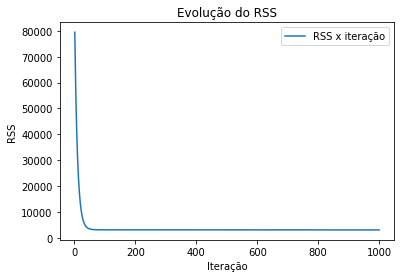

In [5]:
import matplotlib.pyplot as plt
import csv

iteration_array = []
rss_array = []

with open('rss.csv','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        iteration_array.append(int(row[0]))
        rss_array.append(float(row[1]))
        
plt.plot(iteration_array,rss_array, label='RSS x iteração')
plt.xlabel('Iteração')
plt.ylabel('RSS')
plt.title('Evolução do RSS')
plt.legend()
plt.show()

Como podemos visualizar acima, o RSS diminui com o passar das iterações, tendo inicialmente uma variação muito mais acentuada do que nas iterações finais.

## Modificando taxa de aprendizagem e número de iterações

4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Primeiramente variando o número `i` de iterações, considerando os valores de `i=1000, i=10000, e i=100000` ($10^{3}$, $10^{4}$, e $10^{5}$).

In [6]:
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '1000']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '10000']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000']))

Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 10000 iterations b = -3.403329603440687, m = 3.453921047402366, error = 91.8230587797154
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 100000 iterations b = -24.13239667019083, m = 4.687880068225823, error = 41.02011773469914


Variando-se apenas o número de iterações, podemos verificar que, com o valor da taxa de aprendizagem fixada em `0.0001` (valor padrão), quanto maior o número de iterações, mais o nosso algoritmo se aproxima dos valores esperados de `b=-39 e m=5`. Esta aproximação, porém, está acontecendo de forma muito lenta, provavelmente porque a taxa de aprendizagem é muito baixa para o problema em questão. Vejamos, então, como nosso algoritmo se comporta variando a taxa de aprendizagem (learning_rate), considerando os valores de `r=0.0001, r=0.0003, r=0.001 e r=0.003`.

In [7]:
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.0001']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.0003']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.001']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.003']))

Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 100000 iterations b = -24.13239667019083, m = 4.687880068225823, error = 41.02011773469914
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 100000 iterations b = -37.16068806011079, m = 5.463427642785758, error = 30.0781032850494
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 100000 iterations b = -39.44332204413956, m = 5.599308181295304, error = 29.82881660998503
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 100000 iterations b = -39.44625667908033, m = 5.599482874118976, error = 29.82881619900622


Com os dados obtidos até aqui, podemos verificar que uma taxa de aprendizagem próxima a `0.001`é o suficiente para convergir para os valores esperados de `b=-39 e m=5` dentro de 100000 ($10^{5}$) iterações.

## Modificando a condição de parada

5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.

Até aqui, o algoritmo era executado um número de vezes específico, considerando apenas o parâmetro `num-iterations`. Em alguns casos, entretanto, podemos usar algum critério de convergência para a parada do algoritmo. Neste exemplo, vamos utilizar o argumento `--min-gradient` que faz com que o algoritmo pare de executar quando o tamanho do gradiente da iteração (tanto para b quanto para m) for menor que um limiar definido como parâmetro. A seguir, avaliamos a evolução do gradiente a cada iteração, considerando o valor de `e=0.01`:

In [8]:
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.001', '--min-gradient', '0.1', '--save-gradients']))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.001', '--min-gradient', '0.01', '--save-gradients']))


Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 38164 iterations b = -38.39494064402196, m = 5.536900177993809, error = 29.881560777863438
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 62374 iterations b = -39.34112773166238, m = 5.593224762617947, error = 29.829343618144062


Os dados gerados na execução acima foram salvos no arquivo "gradients.csv", no formato `iter,b_gradient,m_gradient`, onde `iter` é o número da iteração, `b_gradient` é o tamanho do gradiente do fator *b*, e `m_gradient` é o tamanho do gradiente do fator *m*. A seguir temos a visualização do comportamento do tamanho do gradiente para os fatores *b* e *m*.

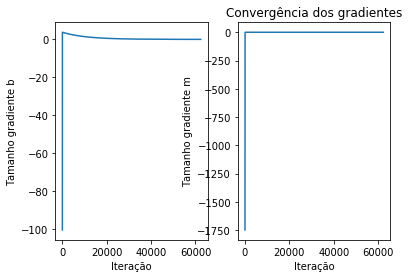

In [9]:
iteration_array = []
gradient_b_array = []
gradient_m_array = []

with open('gradients.csv','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        iteration_array.append(int(row[0]))
        gradient_b_array.append(float(row[1]))
        gradient_m_array.append(float(row[2]))

plt.subplot(1,2,1)
plt.plot(iteration_array,gradient_b_array)
plt.xlabel('Iteração')
plt.ylabel('Tamanho gradiente b')

plt.subplot(1,2,2)
plt.plot(iteration_array,gradient_m_array)
plt.xlabel('Iteração')
plt.ylabel('Tamanho gradiente m')

plt.title('Convergência dos gradientes')
plt.show()

6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

Como podemos ver, considerando um valor de *`e=0.01`*, o algoritmo consegue convergir para valores de *m* e *b* com apenas 62% do número máximo de iterações previstas. O valor dos parâmetros *m* e *b* obtidos se aproximam bastante dos valores obtidos anteriormente. Se considerarmos um valor de `e=0.1`, o número de iterações é reduzido ainda mais, para apenas 38% do número máximo de iterações.

## Equações normais

7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

É possível, também, calcular os coeficientes de uma regressão linear utilizando uma equação matemática de forma fechada, definida a seguir:

$ŵ_{0} = \bar{y} - ŵ_{1}\bar{x}$

$ŵ_{1} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}$

Comparando o tempo de execução de ambos os algoritmos:

In [13]:
import time

t1 = int(round(time.time() * 1000))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--learning-rate','0.001', '--min-gradient', '0.01', '--normal-equation']))
t2 = int(round(time.time() * 1000))
gd.run(parser.parse_args(['--data-file', 'income.csv', '--num-iterations', '100000','--learning-rate','0.001', '--min-gradient', '0.01']))
t3 = int(round(time.time() * 1000))

gd_time = t3 - t2
ne_time = t2 - t1

print("O algoritmo de regressão linear usando gradiente descendente demorou {0}ms.".format(gd_time))
print("O algoritmo de regressão linear usando equação normal demorou {0}ms.".format(ne_time))

Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 1 iterations b = -39.44625667909616, m = 5.599482874119918, error = 29.82881619900623
Starting gradient descent at b = 0.0, m = 0.0, error = 2946.6344970460195
After 62374 iterations b = -39.34112773166238, m = 5.593224762617947, error = 29.829343618144062
O algoritmo de regressão linear usando gradiente descendente demorou 2267ms.
O algoritmo de regressão linear usando equação normal demorou 1ms.


Como podemos notar, o algoritmo de regressão linear usando a forma fechada teve duração de execução bem inferior ao algoritmo de regressão linear usando gradiente descendente. Esse resultado era esperado, considerando-se que nossos dados têm apenas um atributo sendo avaliado. Em casos em que a quantidade de atributos considerados é muito alta, a computação do algoritmo de regressão linear usando fórmula fechada pode acabar sendo mais custoso que o algoritmo que usa gradiente descendente.

## Código final

O código final desta atividade se encontra a seguir:

```python
import numpy
import argparse

def linear_regression_normal_equation(points, starting_b, starting_m):
    mean_array = numpy.mean(points, axis=0)
    mean_x = mean_array[0]
    mean_y = mean_array[1]

    x_mean_err = numpy.subtract(points[:,0], mean_x)
    x_mean_sqr_error = numpy.square(x_mean_err)
    y_mean_err = numpy.subtract(points[:,1], mean_y)

    m = numpy.sum(numpy.multiply(x_mean_err, y_mean_err))/numpy.sum(x_mean_sqr_error)
    b = mean_y - (m * mean_x)
    return [b, m]

def RSS(b, m, points, print_rss):
    rss = 0.0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        rss += (y - (m*x + b)) ** 2
    if print_rss:
        print("RSS: {0:.2f}".format(rss))
    return rss

def compute_error_for_line_given_points(b, m, points):
    rss = RSS(b, m, points, False)    
    return rss / len(points)

def step_gradient(b_current, m_current, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float((len(points)))
    for i in range(int(N)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)

    return [new_b, new_m, b_gradient, m_gradient]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, epsilon, print_rss, print_gradient, normal_equation):
    b = starting_b
    m = starting_m
    iter_count = 0
    out_f = None
    if normal_equation:
        iter_count = 1
        [b, m] = linear_regression_normal_equation(numpy.array(points), starting_b, starting_m)
    else:
        if print_gradient:
            out_f = open("gradients.csv","w")
        for i in range(num_iterations):
            # print("#iter: {:d}".format(i))
            [b, m, b_gradient, m_gradient] = step_gradient(b, m, numpy.array(points), learning_rate)
            if print_gradient:
                out_f.write("{:d},{:.5f},{:.5f}\n".format((i+1), b_gradient, m_gradient))
            rss = RSS(b, m, points, print_rss)
            iter_count += 1
            if abs(b_gradient) < epsilon and abs(m_gradient) < epsilon:
                # print("b_gradient: {:.5f}; m_gradient: {:.5f}; epsilon: {:.5f}".format(b_gradient, m_gradient, epsilon))
                break
    if out_f is not None:
        out_f.close()
    return [b, m, iter_count]

def run(args):
    points = None
    try:
        points = numpy.genfromtxt(args.data_file, delimiter=",")
        if len(points[0]) == 1:
            raise Exception('')
    except Exception:
        points = numpy.genfromtxt(args.data_file, delimiter=" ")
        if len(points[0]) == 1:
            raise Exception('Unexpected file delimiter!')
            
    # hyperparameters
    learning_rate = args.learning_rate

    # y = mx + b (slope formula)
    initial_b = args.initial_b
    initial_m = args.initial_m

    print( "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    [b, m, num_iterations_needed] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, args.num_iterations, args.epsilon, args.print_rss, args.print_gradient, args.normal_equation)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations_needed, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--data-file', default="data.csv", dest='data_file', type=str)
    parser.add_argument('-b', '--initial-b', default=0.0, dest='initial_b', type=float)
    parser.add_argument('-m', '--initial-m', default=0.0, dest='initial_m', type=float)
    parser.add_argument('-i', '--num-iterations', default=1000, dest='num_iterations', type=int)
    parser.add_argument('-r', '--learning-rate', default=0.0001, dest='learning_rate', type=float)
    parser.add_argument('-e', '--min-gradient', default=0.00, dest='epsilon', type=float)
    parser.add_argument('--show-rss', action='store_true', dest='print_rss')
    parser.add_argument('--show-gradient', action='store_true', dest='print_gradient')
    parser.add_argument('--normal-equation', action='store_true', dest='normal_equation')
    args = parser.parse_args()

    run(args)
```